<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Cluster-taxonony" data-toc-modified-id="Cluster-taxonony-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cluster taxonony</a></span></li><li><span><a href="#EggNOG-mapper-annotations" data-toc-modified-id="EggNOG-mapper-annotations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>EggNOG-mapper annotations</a></span><ul class="toc-item"><li><span><a href="#CAZy" data-toc-modified-id="CAZy-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>CAZy</a></span></li></ul></li><li><span><a href="#KEGG-pathway" data-toc-modified-id="KEGG-pathway-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>KEGG pathway</a></span></li><li><span><a href="#Checking-key-overlap" data-toc-modified-id="Checking-key-overlap-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Checking key overlap</a></span></li></ul></li><li><span><a href="#Join/format" data-toc-modified-id="Join/format-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Join/format</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Clean-up" data-toc-modified-id="Clean-up-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Clean-up</a></span></li></ul></li></ul></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Taxonomy</a></span></li><li><span><a href="#COG" data-toc-modified-id="COG-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>COG</a></span><ul class="toc-item"><li><span><a href="#by-taxonomy" data-toc-modified-id="by-taxonomy-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>by taxonomy</a></span><ul class="toc-item"><li><span><a href="#Just-bacteria" data-toc-modified-id="Just-bacteria-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Just bacteria</a></span></li><li><span><a href="#Just-archaea" data-toc-modified-id="Just-archaea-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Just archaea</a></span></li><li><span><a href="#Just-viruses" data-toc-modified-id="Just-viruses-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Just viruses</a></span></li></ul></li></ul></li><li><span><a href="#KEGG" data-toc-modified-id="KEGG-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>KEGG</a></span><ul class="toc-item"><li><span><a href="#by-taxonomy" data-toc-modified-id="by-taxonomy-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>by taxonomy</a></span></li></ul></li><li><span><a href="#CAZy" data-toc-modified-id="CAZy-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>CAZy</a></span><ul class="toc-item"><li><span><a href="#by-taxonomy" data-toc-modified-id="by-taxonomy-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>by taxonomy</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summarize clust50 dataset
* Using diamond (NCBI nr database) taxonomy

# Var

In [239]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/abund/'

# gene cluster rep sequences
clust_rep_seq_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/cluster/linclust/clusters_rep-seqs.faa'

# cluster dir
clust_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome',
                      'multi-study', 'BioProjects', 'merged', 'linclust50')

# params
threads = 16

# Init

In [240]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [241]:
# misc
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/abund/ 


# Load

## Cluster taxonony

In [242]:
# reading in taxonomy table
## WARNING: slow
base_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS/'
tax_file = file.path(base_dir, 'taxonomy', 'diamond_sensitive', 'taxonomy.tsv.gz')
cmd = glue::glue('gunzip -c {F}', F=tax_file)
tax = Fread(cmd=cmd, header=FALSE)

## formatting
colnames(tax) = c ('seqid', 'taxID', 'evalue', 'taxonomy', 'taxIDs') 
tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = tax %>%
    dt_select(-taxIDs) %>%
    dt_separate(taxonomy, tax_levs, sep=';') %>%
    dt_filter(!is.na(Domain), !is.na(Phylum), Domain != '', 
              !(Domain %in% c('Archaea','Bacteria', 'Eukaryota') & 
                Phylum %in% c('unknown', 'uc_Bacteria', '')))

tax %>% dt_pull(Domain) %>% table
tax %>% unique_n('Domains', Domain)
tax %>% unique_n('Phyla', Phylum)
tax

.
  Archaea  Bacteria Eukaryota   Viruses 
     3165   2758301    544164      9001 

No. of unique Domains: 4 
No. of unique Phyla: 136 


seqid,taxID,evalue,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
186964524ed64aa9a1c5f88f4819c8a2,186634,1.1e-19,Eukaryota,Chordata,Actinopteri,,,,NA
797471e3477644049817086e2543cdd7,7953,1.9e-08,Eukaryota,Chordata,Actinopteri,Cypriniformes,Cyprinidae,,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ecdbd181282140ccb8307cb2fc8afc89,815,4.1e-49,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,,NA
7375ad24b42d4ab5bd9bba2308402cf3,216851,1.1e-101,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,NA


## EggNOG-mapper annotations

In [243]:
# eggnog-mapper v2
cols = c(
"query_name",
"seed_eggNOG_ortholog",
"seed_ortholog_evalue",
"seed_ortholog_score",
"Predicted_taxonomic_group",
"Predicted_protein_name",
"Gene_Ontology_terms",
"EC_number",
"KEGG_ko",
"KEGG_Pathway",
"KEGG_Module",
"KEGG_Reaction",
"KEGG_rclass",
"BRITE",
"KEGG_TC",
"CAZy",
"BiGG_Reaction",
"tax_scope__eggNOG_taxonomic_level_used_for_annotation",
"eggNOG_OGs",
"bestOG",
"COG_Functional_Category",
"eggNOG_free_text_description"
)

In [244]:
F = file.path(clust_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
#cmd = glue::glue('gunzip -c {file} | head -n 10000', file=F, header=FALSE) 
COG_annot = fread(cmd=cmd, sep='\t') 
colnames(COG_annot) = cols
## separate
max_feats = COG_annot %>%
    dt_mutate(n_feats = stringr::str_length(COG_Functional_Category)) %>%
    dt_pull(n_feats) %>% max
new_cols = gsub('^', 'X', 1:(max_feats))
COG_annot = COG_annot %>%
    dt_select(query_name, COG_Functional_Category) %>%
    dt_separate(COG_Functional_Category, into=new_cols, sep='') %>%
    dt_pivot_longer(cols=c(-query_name), names_to='X', values_to='COG_cat') %>%
    dt_filter(!is.na(COG_cat)) %>%
    dt_select(-X) %>%
    dt_rename(seqid = query_name)
COG_annot 

seqid,COG_cat
<chr>,<chr>
6adc6c6b9ab644af811e14d8a5381fbf,C
186964524ed64aa9a1c5f88f4819c8a2,E
⋮,⋮
2d94a00648f14a11aac5167a761130a0,Z
379a71c7de62478db061c09cf413a4d6,Z


In [245]:
# Loading function group descriptions
COG_func_cat_file = '/ebio/abt3_projects/databases_no-backup/humann2/utility_mapping/COG_cateogories.tsv'
COG_func_cat = fread(COG_func_cat_file, sep='\t') %>%
    dt_rename(COG_cat = COG_category)
COG_func_cat

COG_cat,Functional_description,Functional_group
<chr>,<chr>,<chr>
D,"Cell cycle control, cell division, chromosome partitioning",Cellular processes and signaling
M,Cell wall/membrane/envelope biogenesis,Cellular processes and signaling
⋮,⋮,⋮
R,General function prediction only,Poorly characterized
S,Function unknown,Poorly characterized


In [246]:
# checking key overlap
overlap(COG_annot %>% dt_pull(COG_cat),
        COG_func_cat %>% dt_pull(COG_cat))

intersect(x,y): 24 
setdiff(x,y): 0 
setdiff(y,x): 1 
union(x,y): 25 


In [247]:
# joining
COG_annot = COG_annot %>%
    dt_left_join(COG_func_cat, c('COG_cat'))
COG_annot

seqid,COG_cat,Functional_description,Functional_group
<chr>,<chr>,<chr>,<chr>
6adc6c6b9ab644af811e14d8a5381fbf,C,Energy production and conversion,Metabolism
186964524ed64aa9a1c5f88f4819c8a2,E,Amino acid transport and metabolism,Metabolism
⋮,⋮,⋮,⋮
2d94a00648f14a11aac5167a761130a0,Z,Cytoskeleton,Cellular processes and signaling
379a71c7de62478db061c09cf413a4d6,Z,Cytoskeleton,Cellular processes and signaling


### CAZy

In [248]:
F = file.path(clust_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
#cmd = glue::glue('gunzip -c {file} | head -n 10000', file=F, header=FALSE) 
CAZy_annot = fread(cmd=cmd, sep='\t') 
colnames(CAZy_annot) = cols
## separate
max_feats = CAZy_annot %>%
    dt_distinct(CAZy) %>% 
    dt_mutate(n_feats = stringr::str_count(CAZy, ',')) %>%
    dt_pull(n_feats) %>% max
new_cols = gsub('^', 'X', 1:(max_feats + 1))
CAZy_annot = CAZy_annot %>%
    dt_select(query_name, CAZy) %>%
    dt_separate(CAZy, into=new_cols, sep=',') %>%
    dt_pivot_longer(cols=c(-query_name), names_to='X', values_to='CAZy') %>%
    dt_filter(!is.na(CAZy)) %>%
    dt_select(-X) %>%
    dt_rename(seqid = query_name) %>%
    dt_mutate(CAZy_module = gsub('[0-9]+$', '', CAZy),
              CAZy = gsub('^([^0-9]+)([0-9])$', '\\10\\2', CAZy),
              CAZy = gsub('^([^0-9]+)([0-9][0-9])$', '\\10\\2', CAZy))
CAZy_annot 

seqid,CAZy,CAZy_module
<chr>,<chr>,<chr>
96efcedb381249668f99b3b58e619fac,GH013,GH
6548fb2615a44a5eb90c3cd0eb18a3ef,GT004,GT
⋮,⋮,⋮
4e63c868cdbc46118e66d3a6f7a0f479,PL008,PL
d2e507606ee64a9e9bb990007a3f5d47,PL008,PL


In [249]:
# how many clusters with CAZy annot?
CAZy_annot %>% dt_distinct(seqid)

seqid
<chr>
96efcedb381249668f99b3b58e619fac
6548fb2615a44a5eb90c3cd0eb18a3ef
⋮
ada063f4a0db4b5689823c4b03393afb
6c9bb9087e3441cd84a61778e14c6924


## KEGG pathway

In [250]:
# KEGG pathways
## Reading file
F = file.path(clust_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
#cmd = glue::glue('gunzip -c {file} | head -n 10000', file=F, header=FALSE) 
KEGG_ptw = fread(cmd=cmd, sep='\t') 
colnames(KEGG_ptw) = cols
## Formatting
KEGG_ptw = KEGG_ptw %>%
    dt_select(query_name, KEGG_Pathway) %>%
    dt_mutate(KEGG_Pathway = gsub(',map.+', '', KEGG_Pathway))
## Max pathways per seqid 
max_feats = KEGG_ptw %>%
    dt_mutate(n_feats = stringr::str_count(KEGG_Pathway, ',')) %>%
    dt_pull(n_feats) %>% max
new_cols = gsub('^', 'X', 1:(max_feats+1))
## separating 
KEGG_Pathway = KEGG_ptw %>%
    dt_separate(KEGG_Pathway, into=new_cols, sep=',') %>%
    dt_pivot_longer(cols=c(-query_name), names_to='X', values_to='KEGG_pathway') %>%
    dt_select(-X) %>%
    dt_filter(!is.na(KEGG_pathway),
              !grepl('^map', KEGG_pathway)) 
KEGG_Pathway

query_name,KEGG_pathway
<chr>,<chr>
6adc6c6b9ab644af811e14d8a5381fbf,ko00020
fee92ba1bb764d09a608d84b377a7a21,ko02010
⋮,⋮
999fde638aad466982963a1d580d4cd6,ko05231
e2e3b25725e144d0b8887d5f0bce650c,ko05231


In [251]:
# using kegg ptwy mapping file from humann2 to get pathway hierarchies
ptwy_map_file = '/ebio/abt3_projects/databases_no-backup/humann2/utility_mapping/map_kegg-pwy_name_cat.txt.gz'
cmd = glue::glue('gunzip -c {file}', file=ptwy_map_file)
ptwy_map = fread(cmd=cmd, sep='\t', header=FALSE)
colnames(ptwy_map) = c('KEGG_pathway', 'Level1', 'Level2', 'KEGG_Pathway_Name')
ptwy_map 

KEGG_pathway,Level1,Level2,KEGG_Pathway_Name
<chr>,<chr>,<chr>,<chr>
ko01100,Metabolism,Global and overview maps,Metabolic pathways Major
ko01110,Metabolism,Global and overview maps,Biosynthesis of secondary metabolites
⋮,⋮,⋮,⋮
ko07114,Drug Development,Skeleton-based classification,Naphthalene family
ko07117,Drug Development,Skeleton-based classification,Benzodiazepine family


In [252]:
# joining
KEGG_Pathway = KEGG_Pathway %>%
    dt_left_join(ptwy_map, by=c('KEGG_pathway')) %>%
    dt_rename(seqid = query_name)
KEGG_Pathway

seqid,KEGG_pathway,Level1,Level2,KEGG_Pathway_Name
<chr>,<chr>,<chr>,<chr>,<chr>
6adc6c6b9ab644af811e14d8a5381fbf,ko00020,Metabolism,Carbohydrate metabolism,Citrate cycle (TCA cycle)
fee92ba1bb764d09a608d84b377a7a21,ko02010,Environmental Information Processing,Membrane transport,ABC transporters
⋮,⋮,⋮,⋮,⋮
999fde638aad466982963a1d580d4cd6,ko05231,Human Diseases,Cancer: overview,Choline metabolism in cancer
e2e3b25725e144d0b8887d5f0bce650c,ko05231,Human Diseases,Cancer: overview,Choline metabolism in cancer


## Checking key overlap

In [253]:
overlap(tax %>% dt_distinct(seqid) %>% dt_pull(seqid),
        COG_annot %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 2843280 
setdiff(x,y): 471351 
setdiff(y,x): 596843 
union(x,y): 3911474 


In [254]:
overlap(tax %>% dt_distinct(seqid) %>% dt_pull(seqid),
        KEGG_Pathway %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 1269938 
setdiff(x,y): 2044693 
setdiff(y,x): 286106 
union(x,y): 3600737 


In [255]:
overlap(COG_annot %>% dt_distinct(seqid) %>% dt_pull(seqid),
        KEGG_Pathway %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 1555442 
setdiff(x,y): 1884681 
setdiff(y,x): 602 
union(x,y): 3440725 


# Join/format

Joining tables & formating

In [256]:
# joining
clust = tax %>%
    dt_left_join(KEGG_Pathway, by=c('seqid')) %>%
    dt_left_join(COG_annot, by=c('seqid')) %>%
    dt_left_join(CAZy_annot, by=c('seqid'))
clust

seqid,taxID,evalue,Domain,Phylum,Class,Order,Family,Genus,Species,KEGG_pathway,Level1,Level2,KEGG_Pathway_Name,COG_cat,Functional_description,Functional_group,CAZy,CAZy_module
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
186964524ed64aa9a1c5f88f4819c8a2,186634,1.1e-19,Eukaryota,Chordata,Actinopteri,,,,NA,NA,NA,NA,NA,E,Amino acid transport and metabolism,Metabolism,NA,NA
797471e3477644049817086e2543cdd7,7953,1.9e-08,Eukaryota,Chordata,Actinopteri,Cypriniformes,Cyprinidae,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ecdbd181282140ccb8307cb2fc8afc89,815,4.1e-49,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,,NA,ko02010,Environmental Information Processing,Membrane transport,ABC transporters,P,Inorganic ion transport and metabolism,Metabolism,NA,NA
7375ad24b42d4ab5bd9bba2308402cf3,216851,1.1e-101,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,NA,NA,NA,NA,NA,S,Function unknown,Poorly characterized,NA,NA


In [257]:
# summary
clust %>% unique_n('clusters', seqid)

No. of unique clusters: 3314631 


### Clean-up

In [258]:
# removing original tables to save on memmory
rm(tax)
rm(COG_annot)
rm(KEGG_Pathway)
rm(CAZy_annot)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,4914107,262.5,13908730,742.9,21732390,1160.7
Vcells,1008291981,7692.7,3164936758,24146.6,4101402004,31291.3


# Taxonomy

In [267]:
# summarizing taxonomy
clust %>%
    dt_filter(Domain != '', Phylum != '') %>%
    dt_distinct(Domain, Phylum) %>%
    dt_count(by=list(Domain)) 

Domain,N
<chr>,<int>
Eukaryota,37
Bacteria,88
Archaea,10


In [259]:
# summarizing taxonomy
clust_s = clust %>%
    dt_filter(Domain != '', Phylum != '') %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(Domain, Phylum)) %>%
    dt_arrange(-N)

clust_s %>% unique_n('Phyla', Phylum)
df.dims(20)
clust_s %>% dt_slice_head(20)
df.dims()

No. of unique Phyla: 135 


Domain,Phylum,N
<chr>,<chr>,<int>
Bacteria,Proteobacteria,1888435
Eukaryota,Chordata,525350
Bacteria,Firmicutes,410693
Bacteria,Bacteroidetes,255362
Bacteria,Actinobacteria,88975
Bacteria,Fusobacteria,88094
Bacteria,Tenericutes,9885
Bacteria,Spirochaetes,8612
Eukaryota,Streptophyta,7075


In [260]:
# microbial 
clust_s = clust %>%
    dt_filter(Domain %in% c('Archaea', 'Bacteria', 'Viruses'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', ''))
             ) %>%
    dt_mutate(Phylum = ifelse(Phylum == '', 'unknown', Phylum)) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(Domain, Phylum)) %>%
    dt_arrange(-N)

clust_s %>% unique_n('Phyla', Phylum)
df.dims(20)
clust_s %>% dt_slice_head(20)
df.dims()

No. of unique Phyla: 99 


Domain,Phylum,N
<chr>,<chr>,<int>
Bacteria,Proteobacteria,1888435
Bacteria,Firmicutes,410693
Bacteria,Bacteroidetes,255362
Bacteria,Actinobacteria,88975
Bacteria,Fusobacteria,88094
Bacteria,Tenericutes,9885
Viruses,unknown,9001
Bacteria,Spirochaetes,8612
Archaea,Euryarchaeota,3106


In [271]:
clust_s %>%
    dt_filter(N >= 100) %>%
    dt_distinct(Domain, Phylum) %>%
    dt_count(by=list(Domain))

Domain,N
<chr>,<int>
Bacteria,17
Viruses,1
Archaea,1


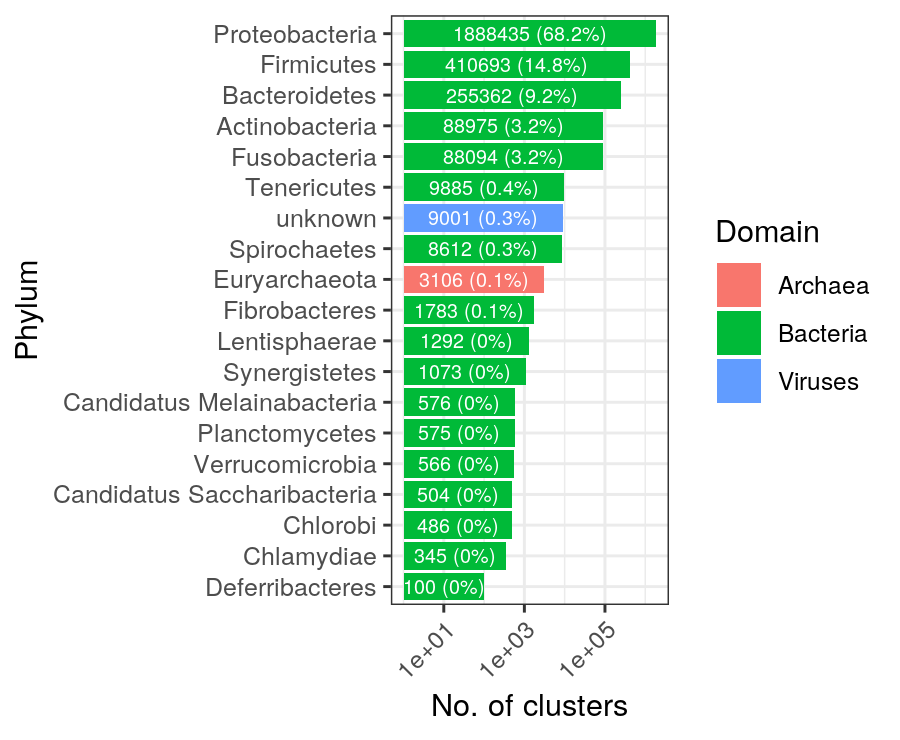

In [273]:
# plotting by phylum (w/ count cutoff)
n_clust = clust_s %>% dt_summarize(N_total = sum(N)) %>% dt_pull(N_total)

p = clust_s %>%
    dt_filter(N >= 100) %>%
    dt_mutate(Phylum = reorder(Phylum, N),
              perc_clusts = N / n_clust * 100,
              N_txt = glue::glue('{N} ({P}%)', N=N, P=round(perc_clusts,1))) %>%
    dt_mutate(Phylum = reorder(Phylum, N)) %>%
    ggplot(aes(Phylum, N, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=sqrt(N), label=N_txt), size=2.5, color='white') +
    scale_y_log10() +
    labs(y = 'No. of clusters') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9),
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(4.5,3.7)
plot(p)

In [112]:
# number of phyla
df.dims(20)
clust_s %>%
    dt_distinct(Phylum, Domain) %>%
    dt_count(Domain)
df.dims()

Domain,N
<chr>,<int>
Bacteria,88
Viruses,1
Archaea,10


In [113]:
# number of phyla
df.dims(20)
clust_s %>%
    dt_filter(N >= 100) %>%
    dt_distinct(Phylum, Domain) %>%
    dt_count(Domain)
df.dims()

Domain,N
<chr>,<int>
Bacteria,17
Viruses,1
Archaea,1


In [274]:
# number of phyla
df.dims(20)
clust_s %>%
    dt_filter(N < 100) %>%
    dt_distinct(Phylum, Domain) %>%
    dt_count(Domain)
df.dims()

Domain,N
<chr>,<int>
Bacteria,71
Archaea,9


In [275]:
# number of phyla
df.dims(20)
clust_s %>%
    dt_filter(N < 100) %>%
    dt_distinct(Phylum, Domain) %>%
    dt_filter(grepl('Candid', Phylum)) %>%
    dt_count(Domain)
df.dims()

Domain,N
<chr>,<int>
Bacteria,53
Archaea,7


In [104]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/metagenome/multi-study/09_LLMGAG_all_cluster/02_linclust50/02b_linclust_tax-nr_summary.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



# COG

In [47]:
# summarizing
total_clusts = clust %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

clust_s = clust %>%
    dt_filter(Domain %in% c('Archaea', 'Bacteria', 'Viruses'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', '')),
              !is.na(COG_cat)
             ) %>%
    dt_distinct(seqid, COG_cat, Functional_group) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(COG_cat, Functional_group)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100)

clust_s

COG_cat,Functional_group,N,perc_abund
<chr>,<chr>,<int>,<dbl>
U,Cellular processes and signaling,120411,3.642604
L,Information storage and processing,245903,7.438915
⋮,⋮,⋮,⋮
B,Information storage and processing,1443,0.04365280
A,Information storage and processing,609,0.01842311


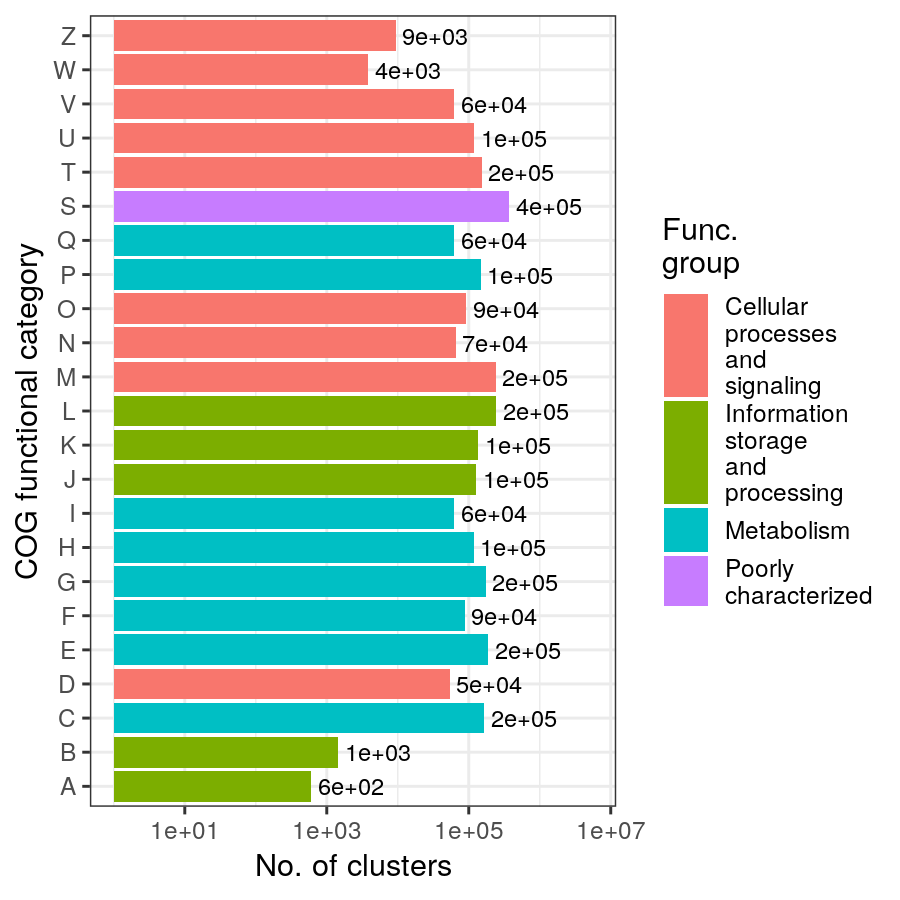

In [51]:
# plotting summary
p = clust_s %>%
    dt_mutate(Functional_group = stringr::str_wrap(Functional_group, 10)) %>%
    ggplot(aes(COG_cat, N, fill=Functional_group)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=formatC(N, format='e', digits=0)), hjust=-0.1, size=3) +
    scale_fill_discrete('Func.\ngroup') +
    scale_y_log10(limits=c(1, 5.5e6)) +
    labs(x='COG functional category', y='No. of clusters') +
    theme_bw() +
    coord_flip()

p.dims(4.5,4.5)
plot(p)

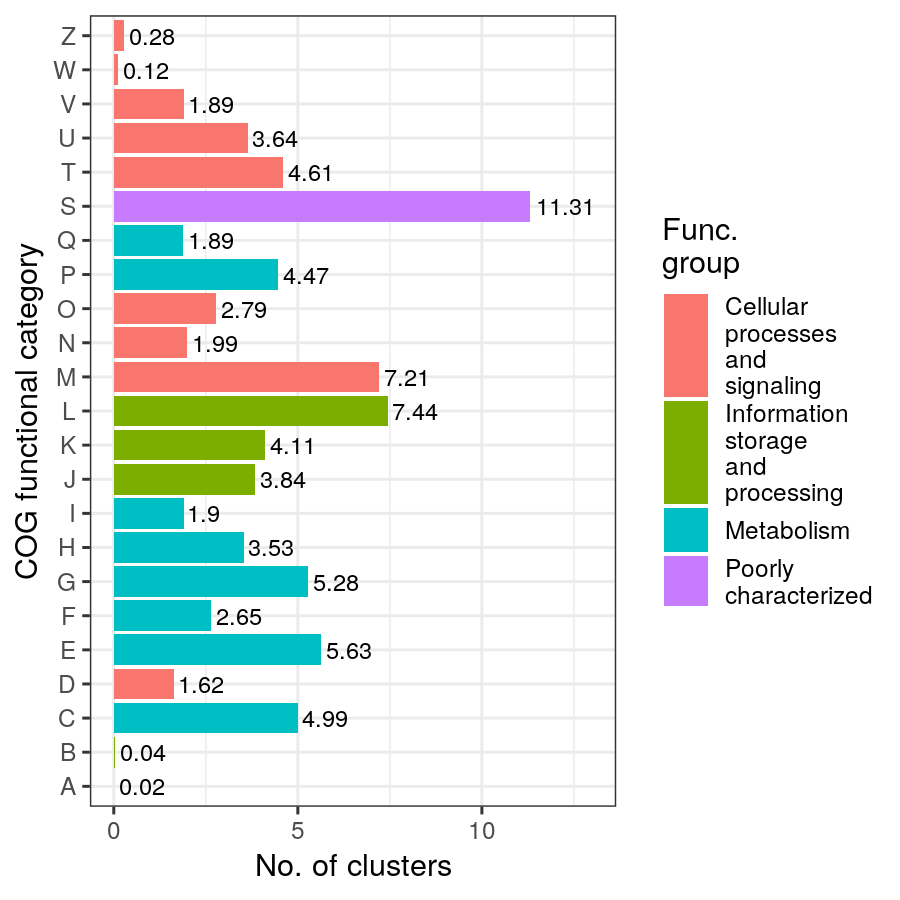

In [58]:
# plotting summary
p = clust_s %>%
    dt_mutate(Functional_group = stringr::str_wrap(Functional_group, 10)) %>%
    ggplot(aes(COG_cat, perc_abund, fill=Functional_group)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=round(perc_abund, 2)), hjust=-0.1, size=3) +
    scale_fill_discrete('Func.\ngroup') +
    scale_y_continuous(limits=c(0, 13)) +
    labs(x='COG functional category', y='No. of clusters') +
    theme_bw() +
    coord_flip()

p.dims(4.5,4.5)
plot(p)

## by taxonomy

In [116]:
# summarizing
total_clusts = clust %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

clust_s = clust %>%
    dt_filter(Domain %in% c('Archaea', 'Bacteria', 'Viruses'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', '')),
              !is.na(COG_cat)
             ) %>%
    dt_mutate(Phylum = ifelse(Phylum == '', 'unknown', Phylum)) %>%
    dt_distinct(seqid, Domain, Phylum, COG_cat, Functional_group) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(Domain, Phylum, COG_cat, Functional_group)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum))

clust_s

Domain,Phylum,COG_cat,Functional_group,N,perc_abund,n_per_phylum
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>
Bacteria,Proteobacteria,U,Cellular processes and signaling,97179,2.931820,1900991
Bacteria,Proteobacteria,L,Information storage and processing,163640,4.936899,1900991
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bacteria,Aquificae,N,Cellular processes and signaling,1,3.016927e-05,43
Bacteria,Acidobacteria,T,Cellular processes and signaling,1,3.016927e-05,41


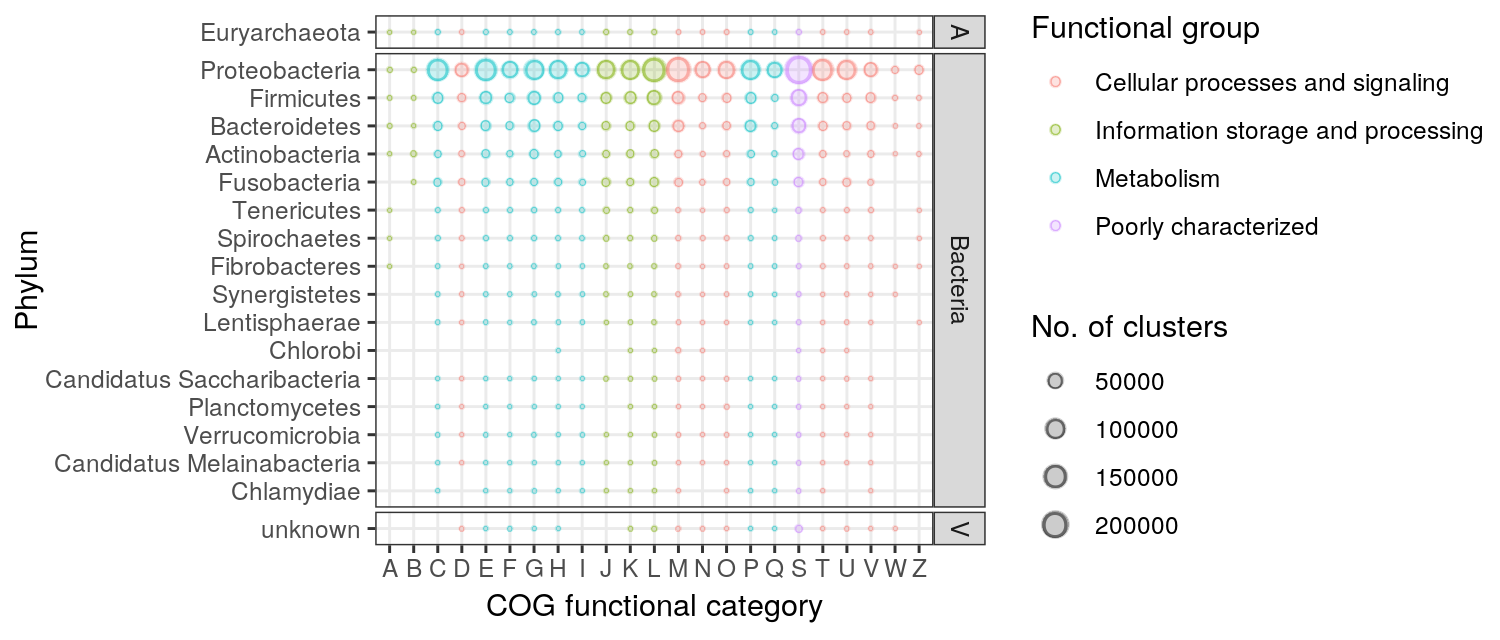

In [131]:
# plotting summary by domain
p = clust_s %>%
    dt_filter(n_per_phylum >= 100) %>%
    dt_mutate(Domain = dt_case(Domain == 'Viruses', 'V',
                               Domain == 'Archaea', 'A',
                               default=Domain),
              Phylum = reorder(Phylum, n_per_phylum)) %>%
    ggplot(aes(COG_cat, Phylum, size=N, color=Functional_group)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_color_discrete('Functional group') +
    scale_size_continuous('No. of clusters', range=c(0.5, 4.5)) +
    labs(x='COG functional category', y='Phylum') +
    facet_grid(Domain ~ ., scales='free_y', space='free_y') +
    theme_bw() +
    theme(
        panel.spacing = unit(0.1, 'lines')
    )

p.dims(7.5,3.2)
plot(p)

### Just bacteria

In [66]:
# summarizing
total_clusts = clust %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

clust_s = clust %>%
    dt_filter(Domain %in% c('Bacteria'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', '')),
              !is.na(COG_cat)
             ) %>%
    dt_distinct(seqid, Domain, Phylum, COG_cat, Functional_group) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(Domain, Phylum, COG_cat, Functional_group)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum))

clust_s

Domain,Phylum,COG_cat,Functional_group,N,perc_abund,n_per_phylum
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>
Bacteria,Proteobacteria,U,Cellular processes and signaling,97179,2.939803,1900991
Bacteria,Proteobacteria,L,Information storage and processing,163640,4.950342,1900991
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bacteria,Aquificae,N,Cellular processes and signaling,1,3.025142e-05,43
Bacteria,Acidobacteria,T,Cellular processes and signaling,1,3.025142e-05,41


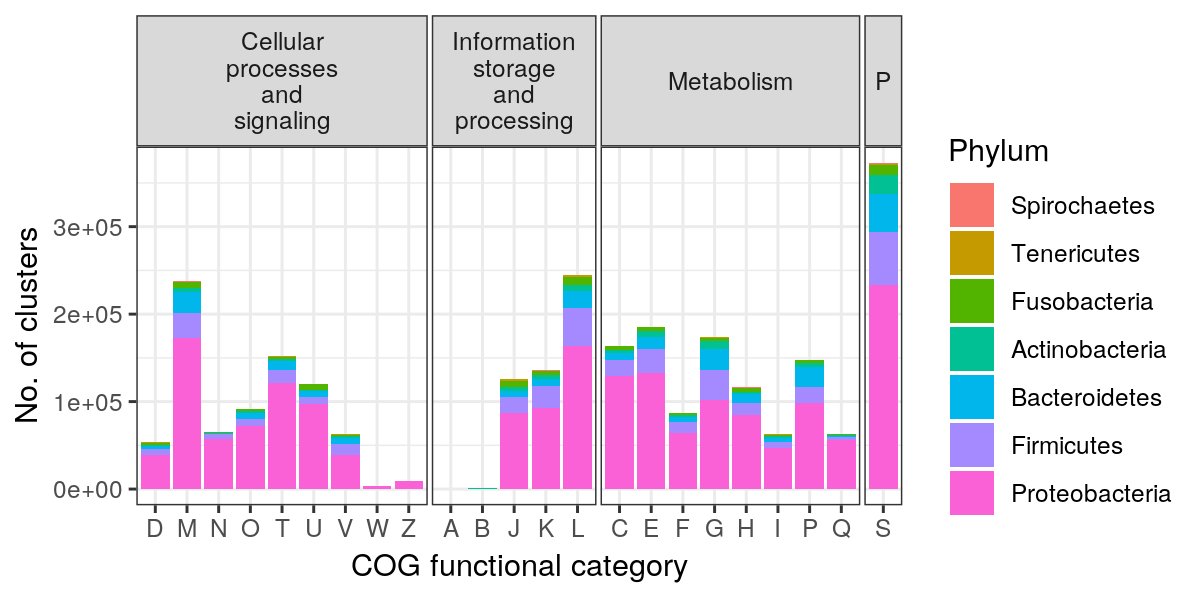

In [67]:
# plotting summary by domain
p = clust_s %>%
    dt_filter(n_per_phylum >= 5000) %>%
    dt_mutate(Functional_group = ifelse(Functional_group == 'Poorly characterized',
                                        'P', Functional_group),
              Functional_group = stringr::str_wrap(Functional_group, 10),
              Phylum = reorder(Phylum, n_per_phylum)) %>%
    ggplot(aes(COG_cat, N, fill=Phylum)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Phylum') +
    facet_grid(. ~ Functional_group, scales='free_x', space='free_x') +
    labs(x='COG functional category', y='No. of clusters') +
    theme_bw() +
    theme(
      panel.spacing = unit(0.1, "lines")
    )

p.dims(6,3)
plot(p)

### Just archaea

In [70]:
# summarizing
total_clusts = clust %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

clust_s = clust %>%
    dt_filter(Domain %in% c('Archaea'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', '')),
              !is.na(COG_cat)
             ) %>%
    dt_distinct(seqid, Domain, Phylum, Class, COG_cat, Functional_group) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(Domain, Phylum, Class, COG_cat, Functional_group)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum, Class))

clust_s

Domain,Phylum,Class,COG_cat,Functional_group,N,perc_abund,n_per_phylum
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>
Archaea,Candidatus Bathyarchaeota,,S,Poorly characterized,7,0.0002117599,11
Archaea,Euryarchaeota,Thermoplasmata,F,Metabolism,15,0.0004537713,267
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Archaea,Candidatus Heimdallarchaeota,,L,Information storage and processing,1,3.025142e-05,1
Archaea,Euryarchaeota,Thermoplasmata,D,Cellular processes and signaling,1,3.025142e-05,267


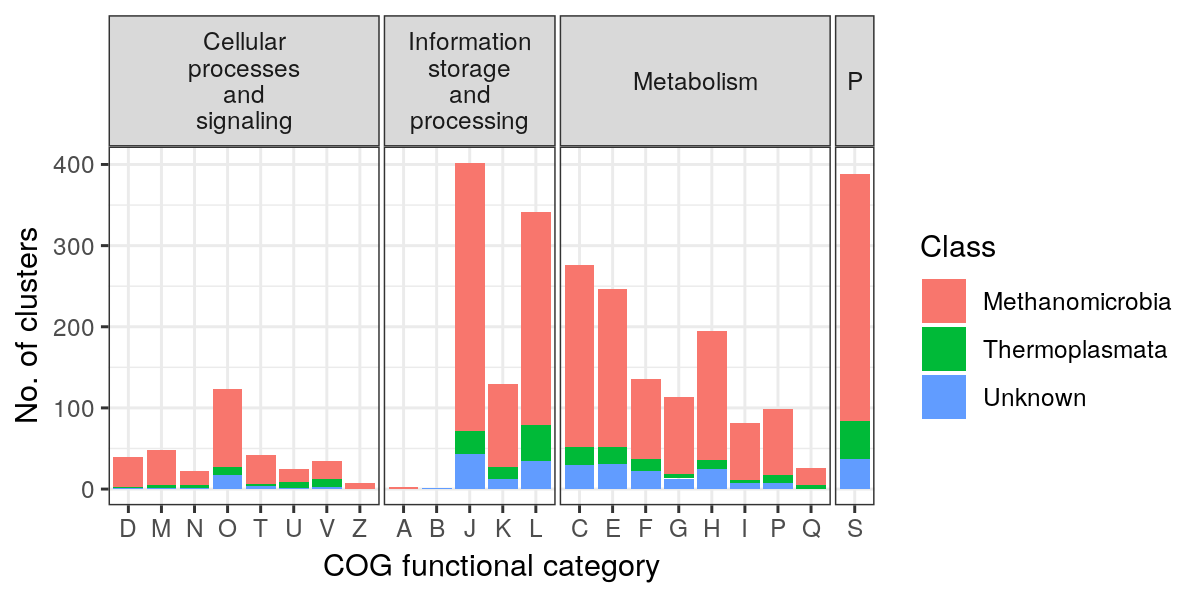

In [72]:
# plotting summary by domain
p = clust_s %>%
    dt_filter(n_per_phylum >= 50) %>%
    dt_mutate(Functional_group = ifelse(Functional_group == 'Poorly characterized',
                                        'P', Functional_group),
              Functional_group = stringr::str_wrap(Functional_group, 10),
              Class = ifelse(Class == '', 'Unknown', Class),
              Phylum = reorder(Phylum, n_per_phylum)) %>%
    ggplot(aes(COG_cat, N, fill=Class)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Class') +
    facet_grid(. ~ Functional_group, scales='free_x', space='free_x') +
    labs(x='COG functional category', y='No. of clusters') +
    theme_bw() +
    theme(
      panel.spacing = unit(0.1, "lines")
    )

p.dims(6,3)
plot(p)

### Just viruses

In [105]:
# summarizing
total_clusts = clust %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

clust_s = clust %>%
    dt_filter(Domain %in% c('Viruses'),
              !is.na(COG_cat)
             ) %>%
    dt_distinct(seqid, Domain, Phylum, COG_cat, Functional_group) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(Domain, Phylum, COG_cat, Functional_group)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum))

clust_s

Domain,Phylum,COG_cat,Functional_group,N,perc_abund,n_per_phylum
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>
Viruses,,S,Poorly characterized,3390,0.10227383,4000
Viruses,,L,Information storage and processing,376,0.01134365,4000
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Viruses,,H,Metabolism,2,6.033854e-05,4000
Viruses,,Q,Metabolism,1,3.016927e-05,4000


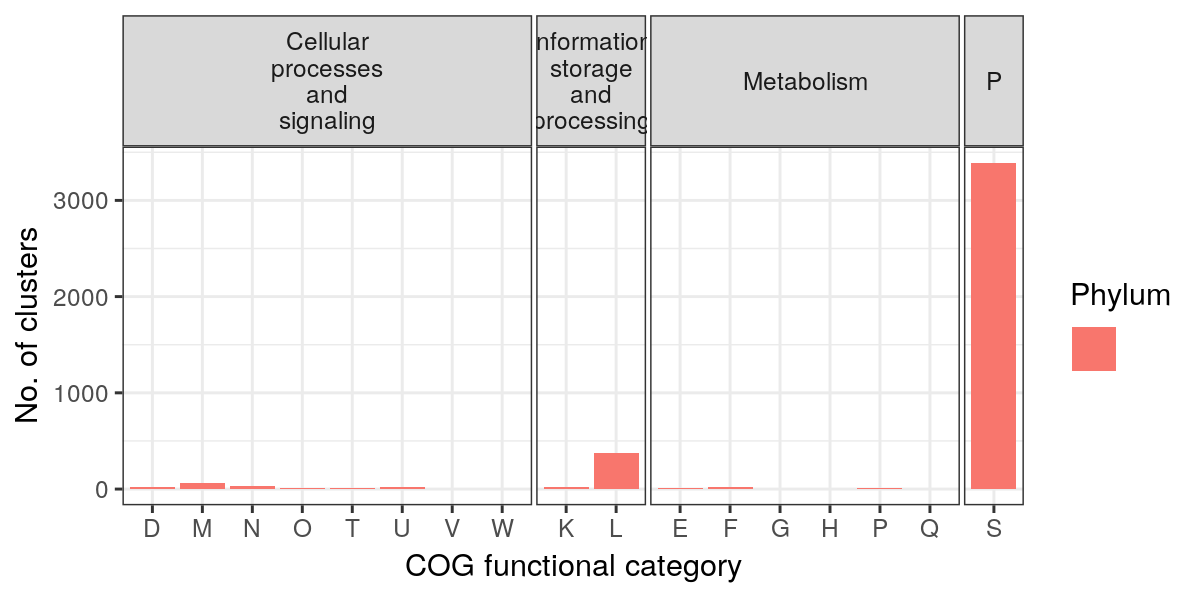

In [107]:
# plotting summary by domain
p = clust_s %>%
    #dt_filter(n_per_phylum >= 5000) %>%
    dt_mutate(Functional_group = ifelse(Functional_group == 'Poorly characterized',
                                        'P', Functional_group),
              Functional_group = stringr::str_wrap(Functional_group, 10),
              Phylum = reorder(Phylum, n_per_phylum)) %>%
    ggplot(aes(COG_cat, N, fill=Phylum)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Phylum') +
    facet_grid(. ~ Functional_group, scales='free_x', space='free_x') +
    labs(x='COG functional category', y='No. of clusters') +
    theme_bw() +
    theme(
      panel.spacing = unit(0.1, "lines")
    )

p.dims(6,3)
plot(p)

# KEGG

In [222]:
# summarizing
total_clusts = clust %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

clust_s = clust %>%
    dt_filter(Domain %in% c('Archaea', 'Bacteria', 'Viruses'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', '')),
              !is.na(KEGG_Pathway_Name)
             ) %>%
    dt_distinct(seqid, KEGG_Pathway_Name, Level1, Level2) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(KEGG_Pathway_Name, Level1, Level2)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100)

clust_s

KEGG_Pathway_Name,Level1,Level2,N,perc_abund
<chr>,<chr>,<chr>,<int>,<dbl>
ABC transporters,Environmental Information Processing,Membrane transport,71948,2.170619
Purine metabolism,Metabolism,Nucleotide metabolism,94299,2.844932
⋮,⋮,⋮,⋮,⋮
Mitophagy - animal,Cellular Processes,Transport and catabolism,1,3.016927e-05
Dilated cardiomyopathy (DCM),Human Diseases,Cardiovascular disease,1,3.016927e-05


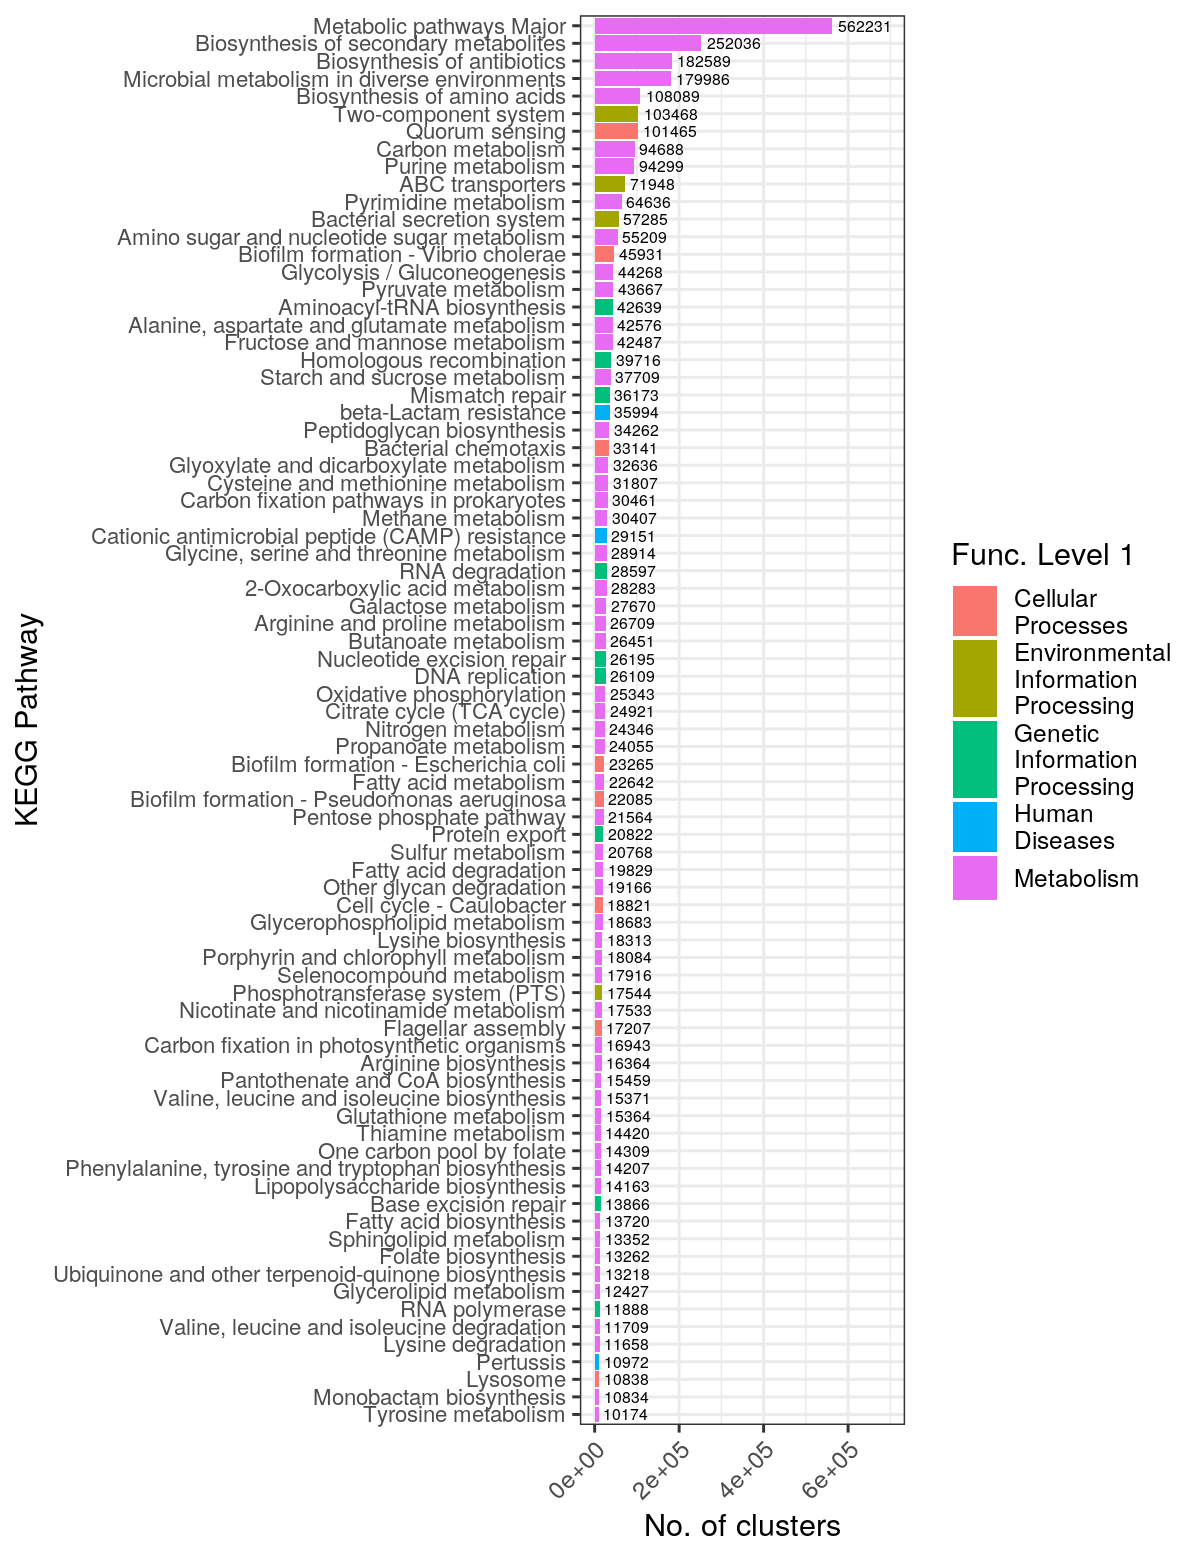

In [224]:
# plotting summary
p = clust_s %>%
    dt_filter(N >= 10000) %>%
    dt_mutate(Level1 = stringr::str_wrap(Level1, 10),
              KEGG_Pathway_Name = reorder(KEGG_Pathway_Name, N)) %>%
    ggplot(aes(KEGG_Pathway_Name, N, fill=Level1)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=N), hjust=-0.1, size=2) +
    scale_y_continuous(limits=c(0, 700000)) +
    scale_fill_discrete('Func. Level 1') +
    labs(x='KEGG Pathway', y='No. of clusters') +  
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(6,7.8)
plot(p)

## by taxonomy

In [225]:
# summarizing
total_clusts = clust %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

clust_s = clust %>%
    dt_filter(Domain %in% c('Archaea', 'Bacteria', 'Viruses'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', '')),
              !is.na(KEGG_Pathway_Name)
             ) %>%
    dt_mutate(Phylum = ifelse(Phylum == '', 'unknown', Phylum)) %>%
    dt_distinct(seqid, Domain, Phylum, KEGG_Pathway_Name, Level1, Level2) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(Domain, Phylum, KEGG_Pathway_Name, Level1, Level2)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum)) %>%
    dt_mutate(n_per_pathway = sum(N), by=list(KEGG_Pathway_Name))

clust_s %>% summary_x('No. clusters per phylum', n_per_phylum)
clust_s %>% summary_x('No. clusters per pathway', n_per_pathway)
clust_s

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
No. clusters per phylum,1,777,16124,431290.6,253562,2955807,1162561,474613.3


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
No. clusters per pathway,1,1169,6968,26776.72,23265,562231,225060.1,91880.41


Domain,Phylum,KEGG_Pathway_Name,Level1,Level2,N,perc_abund,n_per_phylum,n_per_pathway
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>
Bacteria,Proteobacteria,ABC transporters,Environmental Information Processing,Membrane transport,48345,1.458533,2955807,71948
Bacteria,Proteobacteria,Purine metabolism,Metabolism,Nucleotide metabolism,67707,2.042671,2955807,94299
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bacteria,Chlamydiae,Cationic antimicrobial peptide (CAMP) resistance,Human Diseases,Drug resistance: antimicrobial,1,3.016927e-05,230,29151
Bacteria,Chlamydiae,Necroptosis,Cellular Processes,Cell growth and death,1,3.016927e-05,230,5255


In [226]:
# assessing cutoffs
clust_s %>% dt_filter(n_per_phylum >= 1000) %>% unique_n('No. of phyla', Phylum)
clust_s %>% dt_filter(n_per_pathway >= 20000) %>% unique_n('No. of ptwy', KEGG_Pathway_Name)

No. of unique No. of phyla: 10 
No. of unique No. of ptwy: 48 


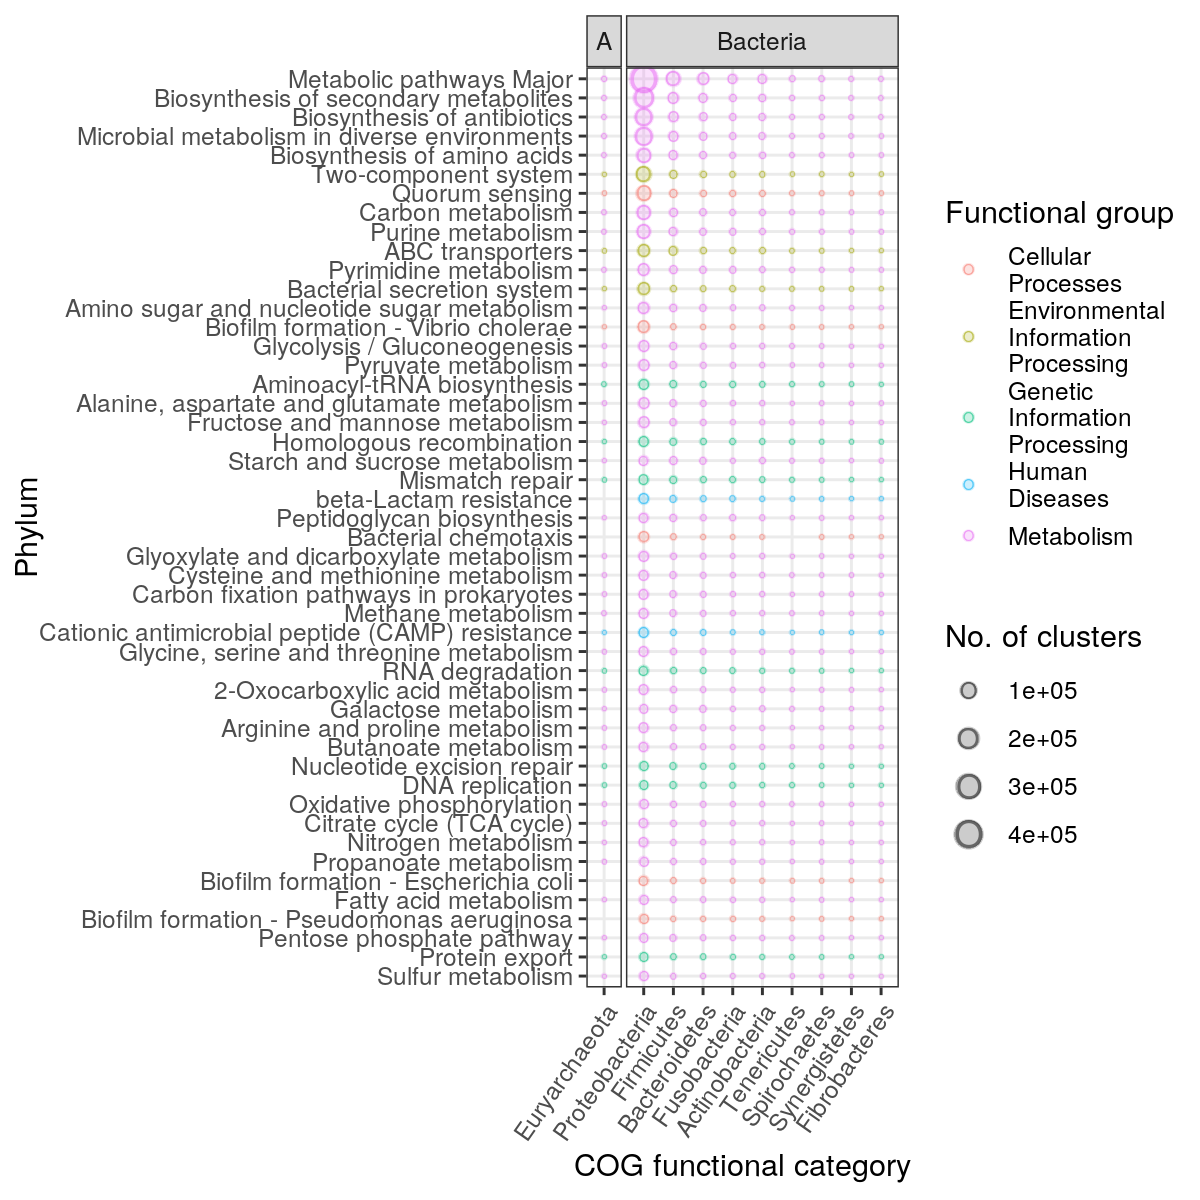

In [227]:
# plotting summary by domain
p = clust_s %>%
    dt_filter(n_per_phylum >= 1000,
              n_per_pathway >= 20000) %>%
    dt_mutate(Domain = dt_case(Domain == 'Viruses', 'V',
                               Domain == 'Archaea', 'A',
                               default=Domain),
              Level1 = stringr::str_wrap(Level1, 10),
              Phylum = Phylum %>% reorder(-n_per_phylum),
              KEGG_Pathway_Name = KEGG_Pathway_Name %>% reorder(n_per_pathway)) %>%
    ggplot(aes(Phylum, KEGG_Pathway_Name, size=N, color=Level1)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_color_discrete('Functional group') +
    scale_size_continuous('No. of clusters', range=c(0.5, 4.5)) +
    labs(x='COG functional category', y='Phylum') +
    facet_grid(. ~ Domain, scales='free_x', space='free_x') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1),
        panel.spacing = unit(0.1, 'lines')
    ) 

p.dims(6,6)
plot(p)

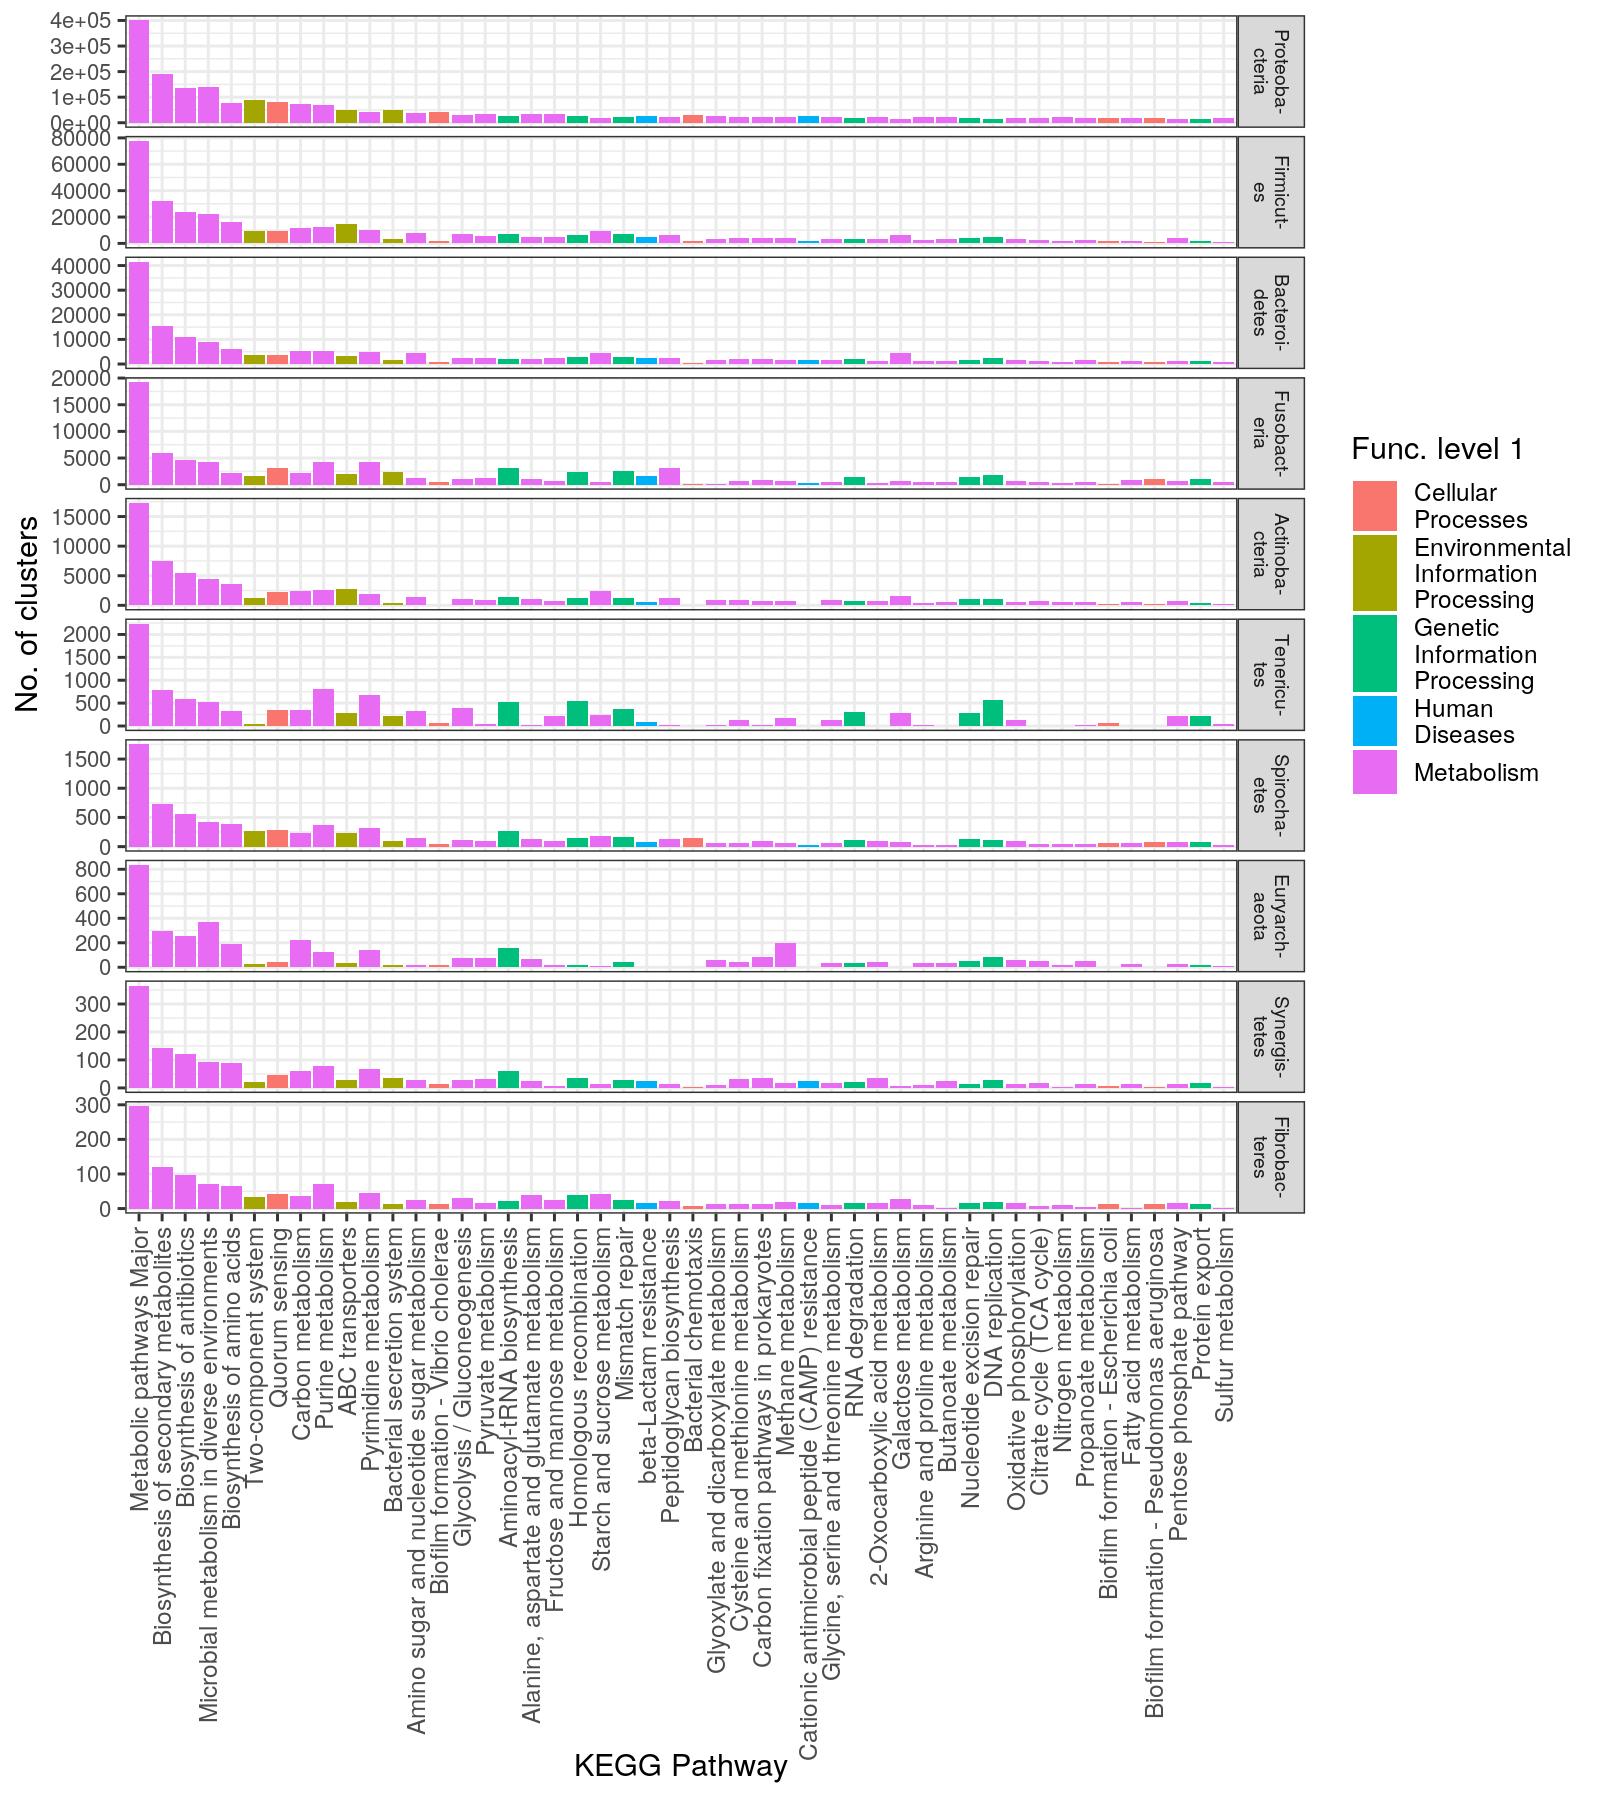

In [238]:
# plotting summary by domain
p = clust_s %>%
    dt_filter(n_per_phylum >= 1000,
              n_per_pathway >= 20000) %>%
    dt_mutate(Level1 = stringr::str_wrap(Level1, 10),
              Phylum = gsub('(.{1,8})', '\\1-\n', Phylum),
              Phylum = gsub('-\n$', '', Phylum),
              Phylum = reorder(Phylum, -n_per_phylum),
              KEGG_Pathway_Name = reorder(KEGG_Pathway_Name, -n_per_pathway)) %>%
    ggplot(aes(KEGG_Pathway_Name, N, fill=Level1)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Func. level 1') +
    facet_grid(Phylum ~ ., scales='free_y') +
    labs(x='KEGG Pathway', y='No. of clusters') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5),
        strip.text = element_text(size=7),
        panel.spacing = unit(0.2, "lines")
    ) 

p.dims(8,9)
plot(p)

# CAZy

In [217]:
# summarizing
total_clusts = clust %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

clust_s = clust %>%
    dt_filter(Domain %in% c('Archaea', 'Bacteria', 'Viruses'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', '')),
              !is.na(CAZy)
             ) %>%
    dt_distinct(seqid, CAZy, CAZy_module) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(CAZy, CAZy_module)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100)

clust_s

CAZy,CAZy_module,N,perc_abund
<chr>,<chr>,<int>,<dbl>
GH013,GH,8511,0.25677066
GH031,GH,2869,0.08655564
⋮,⋮,⋮,⋮
GH116,GH,2,6.033854e-05
PL021,PL,1,3.016927e-05


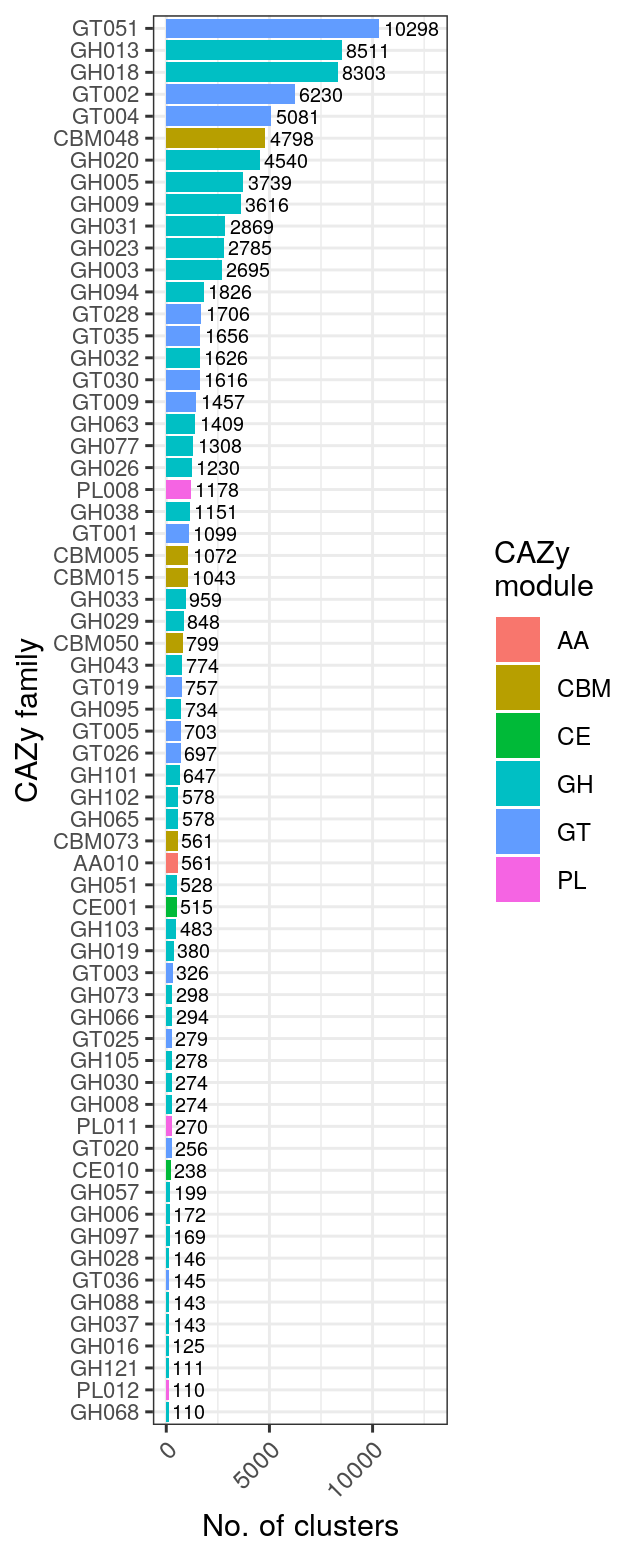

In [221]:
# plotting summary
p = clust_s %>%
    dt_filter(N >= 100) %>%
    dt_mutate(CAZy = reorder(CAZy, N)) %>%
    ggplot(aes(CAZy, N, fill=CAZy_module)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=N), hjust=-0.1, size=2.5) +
    scale_y_continuous(limits=c(0, 13000)) +
    scale_fill_discrete('CAZy\nmodule') +
    labs(x='CAZy family', y='No. of clusters') +  
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(3.2,7.8)
plot(p)

## by taxonomy

In [204]:
# summarizing
total_clusts = clust %>% dt_distinct(seqid) %>% dt_pull(seqid) %>% length

clust_s = clust %>%
    dt_filter(Domain %in% c('Archaea', 'Bacteria', 'Viruses'),
              !(Domain %in% c('Archaea','Bacteria', '') & 
                Phylum %in% c('unknown', 'uc_Bacteria', '')),
              !is.na(CAZy)
             ) %>%
    dt_mutate(Phylum = ifelse(Phylum == '', 'unknown', Phylum)) %>%
    dt_distinct(seqid, Domain, Phylum, CAZy, CAZy_module) %>%
    dt_summarize(N = n_distinct(seqid), 
                 by=list(Domain, Phylum, CAZy, CAZy_module)) %>%
    dt_mutate(perc_abund = N / total_clusts * 100) %>%
    dt_mutate(n_per_phylum = sum(N), by=list(Domain, Phylum)) %>%
    dt_mutate(n_per_CAZy = sum(N), by=list(CAZy))

clust_s

Domain,Phylum,CAZy,CAZy_module,N,perc_abund,n_per_phylum,n_per_CAZy
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>
Bacteria,Proteobacteria,GH013,GH,4929,0.14870434,60649,8511
Bacteria,Proteobacteria,GH031,GH,608,0.01834292,60649,2869
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Archaea,Euryarchaeota,GH005,GH,1,3.016927e-05,13,3739
Archaea,Euryarchaeota,GH009,GH,1,3.016927e-05,13,3616


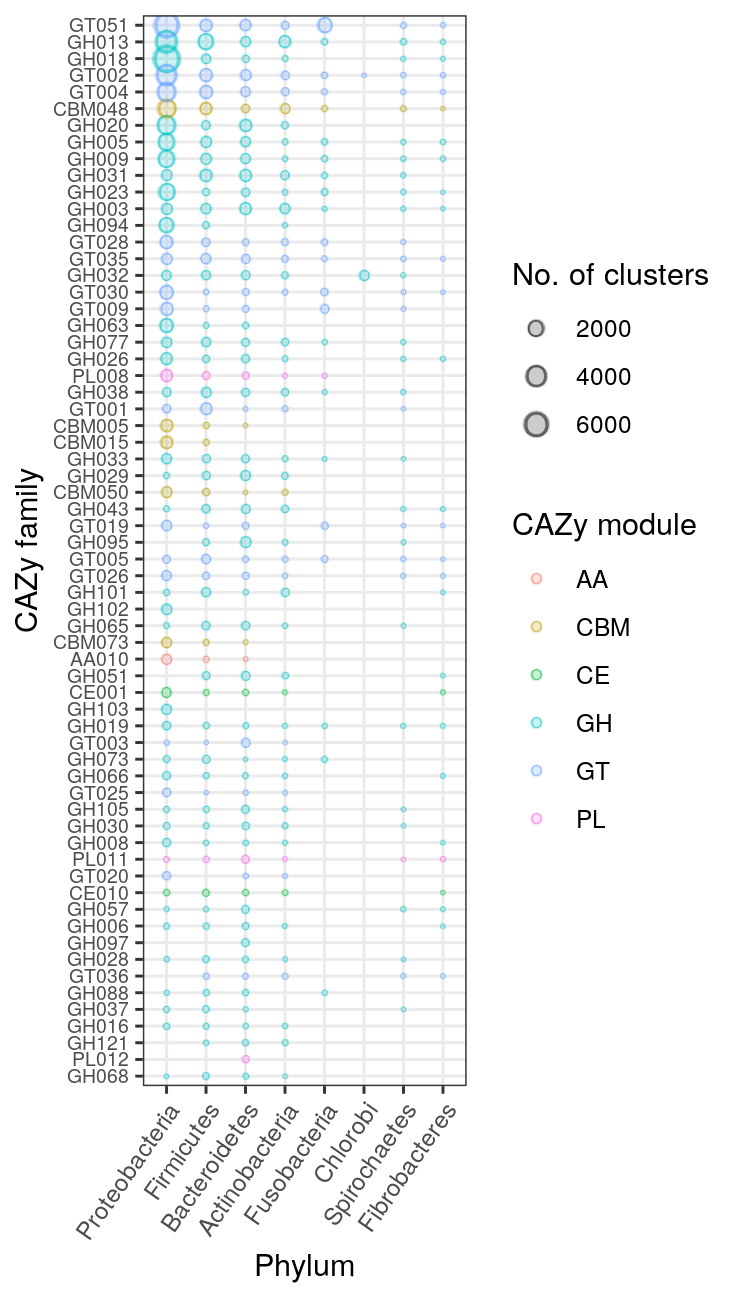

In [215]:
# plotting summary by domain
p = clust_s %>%
    dt_filter(n_per_phylum >= 100,
              n_per_CAZy >= 100) %>%
    dt_mutate(Phylum = reorder(Phylum, -n_per_phylum),
              CAZy = reorder(CAZy, n_per_CAZy)) %>%
    ggplot(aes(CAZy, Phylum, size=N, color=CAZy_module)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_color_discrete('CAZy module') +
    scale_size_continuous('No. of clusters', range=c(0.5, 4.5)) +
    labs(x='CAZy family', y='Phylum') +
    #facet_grid(Domain ~ ., scales='free_y', space='free_y') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7),
        axis.text.x = element_text(angle=55, hjust=1),
        panel.spacing = unit(0.1, 'lines')
    ) +
    coord_flip()

p.dims(3.7,6.5)
plot(p)

# sessionInfo

In [ ]:
sessionInfo()